In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# data collection
titanic_dataset = pd.read_csv('/content/train.csv')

In [ ]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_dataset.shape

(891, 12)

In [ ]:
# our target label is 'survived' as it gives 0/1 required categories
# getting some statistical data about the dataset
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# some info //
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking for some missing values
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
# so there are a large no. of missing values in cabin and age
# we need to do some pre processing
# Handling the missing values ---->

# as we can't find mean/mode in cabin column , we'll just drop this column
titanic_dataset = titanic_dataset.drop(columns='Cabin',axis=1)


In [ ]:
titanic_dataset['Age'].mean()

29.69911764705882

In [ ]:
# now we'll replace all the missing values of Age with the mean of remaining values
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(),inplace=True)

In [ ]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
print(titanic_dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
# for the value of mode , we write
print(titanic_dataset['Embarked'].mode()[0])

S


In [ ]:
# inplace = True , will keep the changes/replacements whichever we did in the data

In [ ]:
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0],inplace=True)


In [ ]:
# titanic_dataset checking missing values again
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#yippee!
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# no. of people survived and died
titanic_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# we'll do encoding of Sex label and drop the Name and Ticket label
titanic_dataset.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [ ]:
titanic_dataset = titanic_dataset.drop(columns=['Name','Ticket'],axis=1)


In [ ]:
titanic_dataset.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,0,27.000000,0,0,13.00,S
887,888,1,1,1,19.000000,0,0,30.00,S
888,889,0,3,1,29.699118,1,2,23.45,S
889,890,1,1,0,26.000000,0,0,30.00,C
890,891,0,3,0,32.000000,0,0,7.75,Q


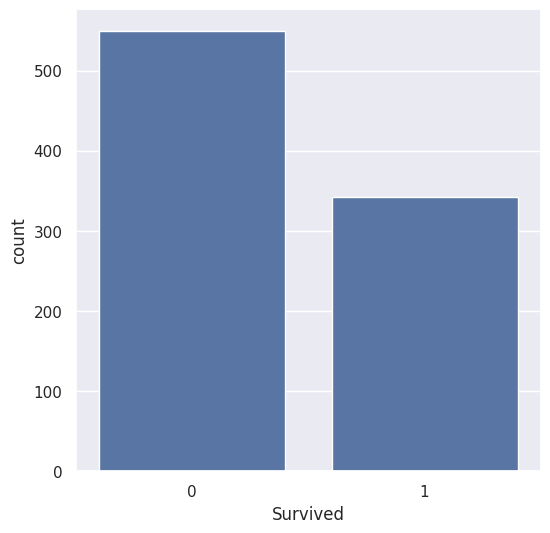

In [ ]:
# Now visualising the data using matplotlib.pyplot and seaborn
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Survived',data=titanic_dataset)
plt.show()


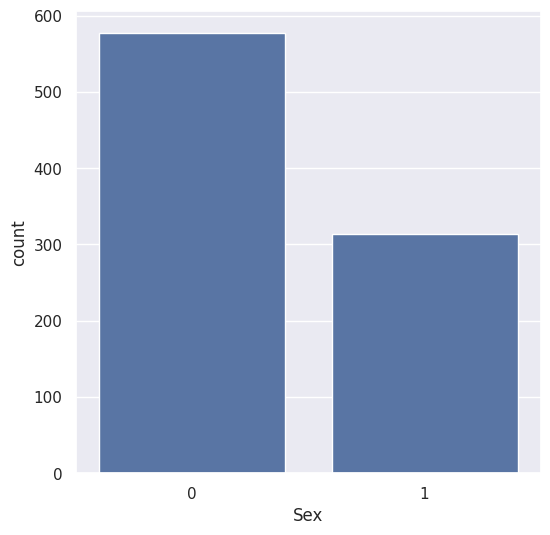

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex',data=titanic_dataset)
plt.show()

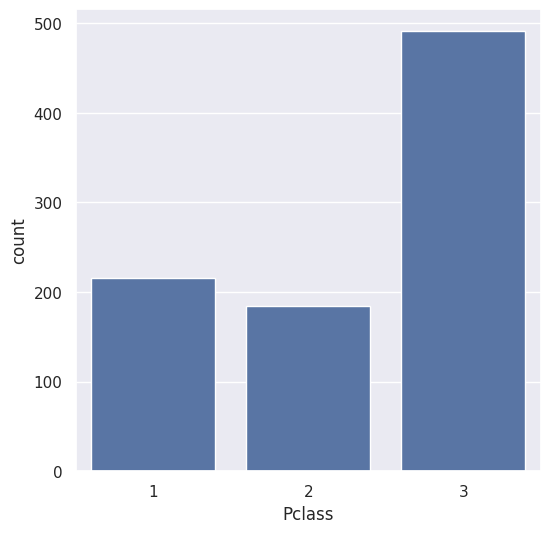

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Pclass',data=titanic_dataset)
plt.show()

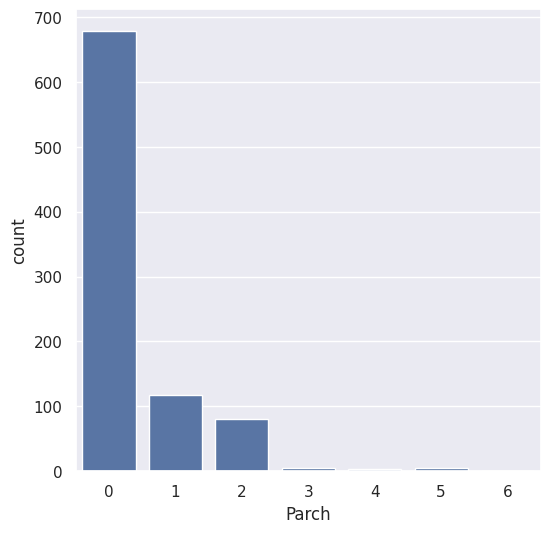

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Parch',data=titanic_dataset)
plt.show()

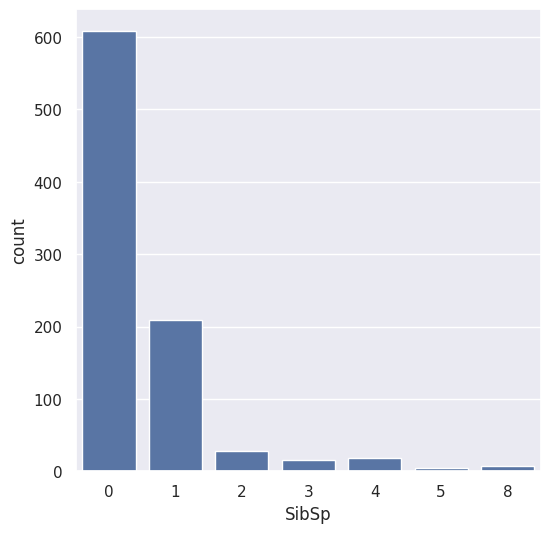

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='SibSp',data=titanic_dataset)
plt.show()

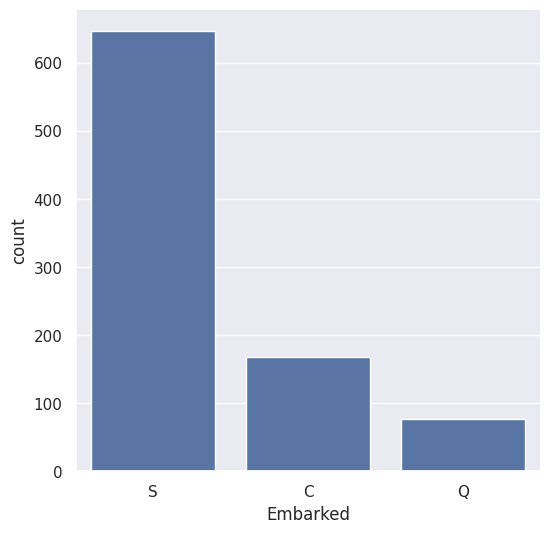

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Embarked',data=titanic_dataset)
plt.show()

<ipython-input-50-1f0a862a08af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset['Age'])


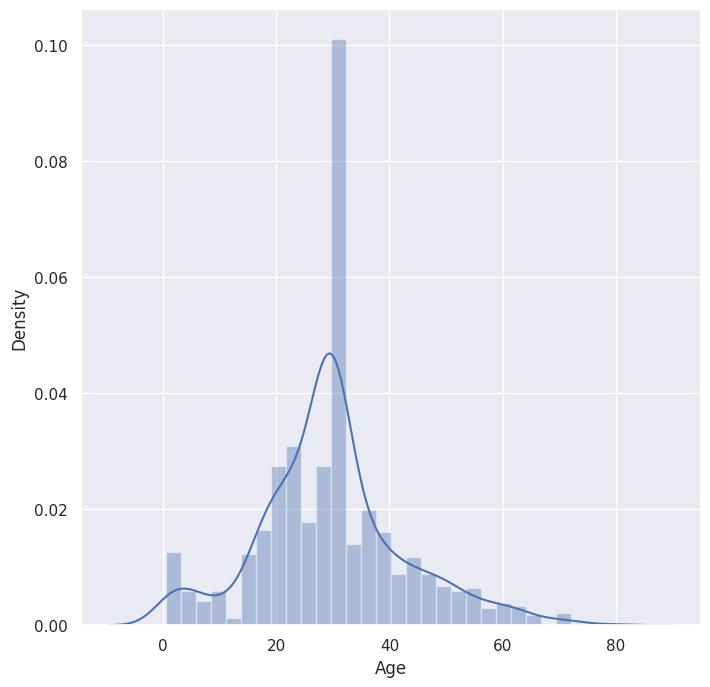

In [ ]:
# making distribution plots for age and fair , as these are not categorical parameters
plt.figure(figsize=(8,8))
sns.distplot(titanic_dataset['Age'])
plt.show()

<ipython-input-51-5e14f737802f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset['Fare'])


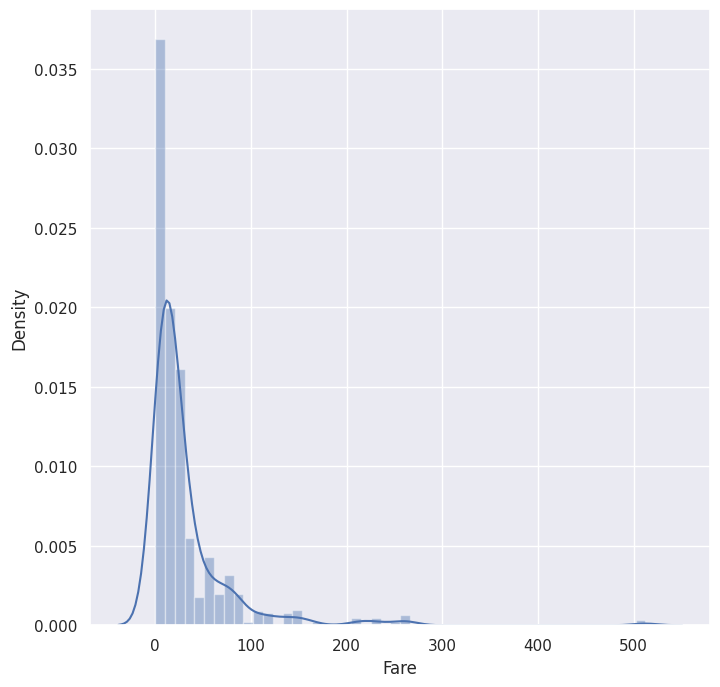

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(titanic_dataset['Fare'])
plt.show()

In [ ]:
titanic_dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# we'll do encoding of Embarked label
titanic_dataset.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
# features and target splitting //
X = titanic_dataset.drop(columns='Survived',axis=1)
Y = titanic_dataset['Survived']

In [ ]:
# our dataset is ready to be fed into the model
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X_train.shape)
print(Y_test.shape)

(712, 8)
(179,)


In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_prediction = model.predict(X_train)
train_accuracy_score = accuracy_score(train_prediction,Y_train)
print(train_accuracy_score)

0.800561797752809


In [ ]:
# thats good //
test_prediction = model.predict(X_test)
test_accuracy_score = accuracy_score(test_prediction,Y_test)
print(test_accuracy_score)
# thats good too

0.8044692737430168


In [ ]:
# building a predictive system //
input_data = (64,3,0,4,3,2,27.9,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
# As we saw prediction is an array
if prediction[0]==0:
  print('Person in Titanic died!')
else :
  print('Person in Titanic survived')


print('The correct answer is : 0')

[0]
Person in Titanic died!
The correct answer is : 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("20+ LPA")

20+ LPA


In [ ]:
print('Please')

Please
